In [1]:
import numpy as np
import pandas as pd
import os
os.chdir("C:\\Users\\kumar\\OneDrive\\Desktop\\Machine Learning")
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [3]:
dataset['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [4]:
print(dataset.groupby('Geography')['CreditScore'].mean())

Geography
France     649.668329
Germany    651.453567
Spain      651.333872
Name: CreditScore, dtype: float64


In [5]:
print(dataset.groupby('CustomerId')['Geography'].value_counts())

CustomerId  Geography
15565701    Spain        1
15565706    Spain        1
15565714    France       1
15565779    Germany      1
15565796    Germany      1
                        ..
15815628    France       1
15815645    France       1
15815656    Germany      1
15815660    France       1
15815690    Spain        1
Name: Geography, Length: 10000, dtype: int64


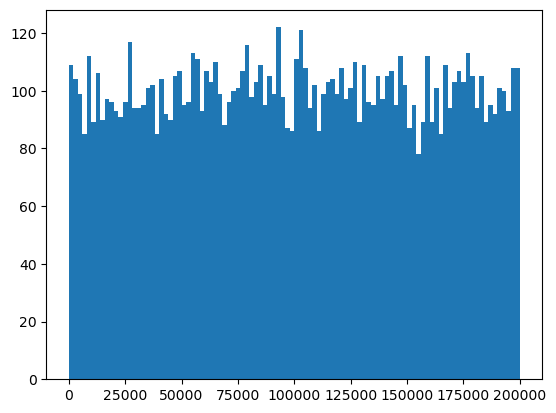

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(dataset['EstimatedSalary'], bins = 100)
plt.show()

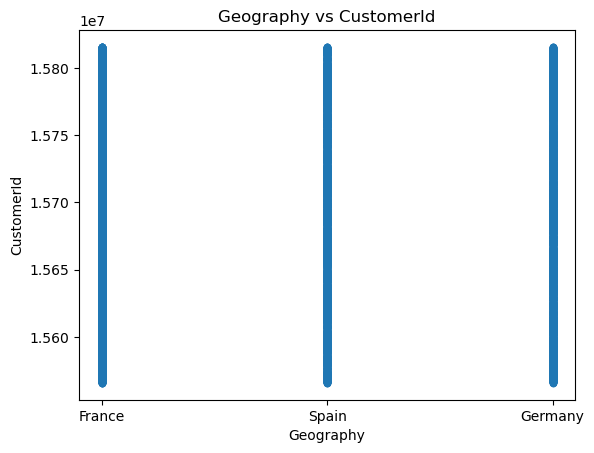

In [7]:
dataset.plot.scatter(x="Geography",y="CustomerId")
plt.title("Geography vs CustomerId")
plt.xlabel("Geography")
plt.ylabel("CustomerId")
plt.show()

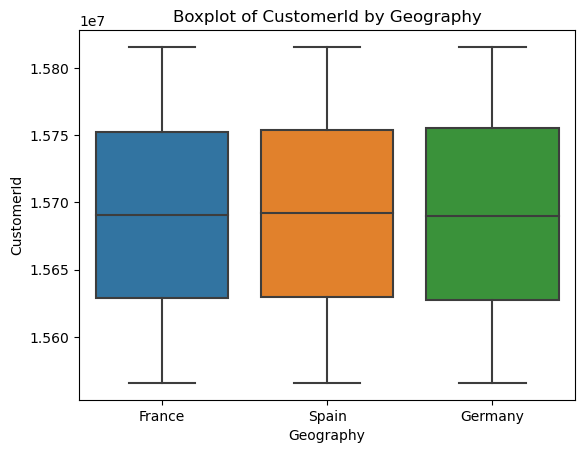

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Geography', y='CustomerId', data=dataset)

plt.title('Boxplot of CustomerId by Geography')
plt.xlabel('Geography')
plt.ylabel('CustomerId')

plt.show()

In [9]:
print(dataset.shape)

(10000, 14)


In [10]:
X = dataset.iloc[:, 0:13].values  # Features (columns 0 to 12)
y = dataset.iloc[:, 13].values   # Target variable (column 13)
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 3] = labelencoder_X_1.fit_transform(X[:, 3])
labelencoder_X_2 = LabelEncoder()
X[:, 4] = labelencoder_X_2.fit_transform(X[:, 4])
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [11]:
categorical_column = dataset.iloc[:, 0]
X_State = pd.get_dummies(categorical_column, drop_first=True)
X_State = X_State.astype(int)
dataset = dataset.drop(columns=[categorical_column.name])
X = pd.concat([X_State, dataset], axis=1)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 0)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [14]:
dataset = dataset.drop(['CustomerId', 'Surname'], axis=1)
categorical_columns = ['Gender', 'Geography']
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)
X = ct.fit_transform(dataset.drop('Exited', axis=1))
y = dataset['Exited']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [17]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)


RandomForestClassifier()

In [18]:
y_pred = clf.predict(X_test)


In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy_score(y_test, y_pred)

0.8635

In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[1544   63]
 [ 210  183]]


# Result Observed

## True Positives(TP) = 183

## True Negatives(TN) = 1544

## False Positives(FP) = 63

## False Negatives(FN) = 210

## Precision = TP/(TP+FP) = 183/(183+63)=183/246=0.744

## Recall = TP/(TP+FN) = 183/(183+210)=183/393=0.4656

## Accuracy = (TP+TN)/(TP+TN+FP+FN) = (183+1544)/(183+1544+63+210)=1727/2000=0.8635